In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
submission = pd.read_csv('submission.csv')
submission

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
2471,0.0,0,0.0
2472,0.0,0,0.0
2473,0.0,0,0.0
2474,0.0,0,0.0


# USA
  target : `Yield (Pounds/ Harvested Area)`

In [756]:
usa_train = pd.read_csv('USA_train.csv',parse_dates=["Year"],index_col="Year")
usa_test = pd.read_csv('USA_test.csv') 

In [609]:
usa_train.State.unique()

array(['AL', 'AR', 'AZ', 'CA', 'FL', 'GA', 'IL', 'KS', 'KY', 'LA', 'MO',
       'MS', 'NC', 'NM', 'NV', 'OK', 'SC', 'TN', 'TX', 'VA'], dtype=object)

In [759]:
usa_test.State.unique()

array(['AL', 'AR', 'AZ', 'CA', 'FL', 'GA', 'IL', 'KS', 'KY', 'LA', 'MO',
       'MS', 'NC', 'NM', 'NV', 'OK', 'SC', 'TN', 'TX', 'VA'], dtype=object)

In [611]:
usa_train["Planted (1000 Acres)"] = usa_train["Planted (1000 Acres)"].str.replace(",","")
usa_train["Harvested (1000 Acres)"] = usa_train["Harvested (1000 Acres)"].str.replace(",","")

In [612]:
usa_train[10:15]

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,MO,220,210,453,NaN,3.716667,69.508333,NaN,44.766667,2.708333,...,430.500000,4.916667,3.862500,2.857500,3.090833,3.058333,4.470000,1.569167,2.283333,1.980000
1975-01-01,MS,1140,1100,456,67.291667,1.483333,77.316667,2.250000,53.283333,3.750000,...,203.500000,-3.083333,4.357500,6.776667,7.129167,4.321667,8.078333,7.468333,5.356667,2.118333
1975-01-01,NC,56,53,415,63.333333,1.150000,72.475000,2.200000,52.200000,1.100000,...,282.083333,-3.250000,3.423333,6.533333,4.423333,4.473333,5.237500,6.317500,4.903333,3.910833
1975-01-01,NM,95,85,385,53.350000,0.425000,69.741667,-0.183333,36.975000,-0.950000,...,439.166667,59.083333,5.820833,3.079167,3.422500,6.754167,6.070000,6.322500,1.463333,1.596667
1975-01-01,NV,1,1,725,51.250000,-0.408333,63.333333,-0.833333,38.158333,2.016667,...,338.916667,44.250000,2.288333,3.027500,4.210000,3.820833,5.300833,4.865000,4.677500,3.877500


In [689]:
usa_train[usa_train['State']=="NV"]

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,NV,1,1,725,51.250000,-0.408333,63.333333,-0.833333,38.158333,2.016667,...,338.916667,44.250000,2.288333,3.027500,4.210000,3.820833,5.300833,4.865000,4.677500,3.877500
1976-01-01,NV,1,1,742,51.516667,1.858333,66.725000,1.558333,36.300000,0.158333,...,308.916667,15.250000,3.373333,2.112500,1.206667,3.820833,3.283333,2.847500,2.585000,1.785000
1977-01-01,NV,1,1,600,52.308333,2.650000,68.166667,1.000000,37.466667,2.325000,...,299.916667,3.250000,-1.740833,-0.001667,1.021667,-0.367500,1.277500,1.841667,1.886667,2.086667
1978-01-01,NV,1,1,543,53.375000,1.716667,63.341667,2.175000,39.225000,3.258333,...,314.166667,18.500000,3.827500,4.566667,3.422500,4.033333,5.562500,4.126667,3.469167,3.669167
1979-01-01,NV,1,1,659,53.633333,0.975000,66.150000,2.245833,38.125000,-0.016667,...,323.500000,28.833333,6.337500,5.076667,5.337500,5.948333,2.547500,5.417500,1.209167,2.730833
1980-01-01,NV,1,1,643,52.350000,1.691667,64.625000,1.458333,41.033333,3.891667,...,287.416667,-6.250000,3.231667,6.970833,4.125000,6.735833,6.750833,6.315000,5.186667,5.386667
1981-01-01,NV,1,1,804,55.825000,2.166667,68.400000,5.233333,42.241667,5.100000,...,272.000000,14.166667,-0.956667,0.782500,-0.492500,2.118333,-0.389167,1.175000,2.039167,0.239167
1982-01-01,NV,1,1,618,50.108333,1.825000,64.400000,0.233333,36.791667,2.650000,...,342.833333,48.166667,2.288333,2.006667,2.151667,3.820833,5.686667,6.250833,5.335833,5.535833
1983-01-01,NV,0,0,0,50.458333,0.800000,62.208333,-1.958333,38.733333,3.591667,...,311.000000,16.333333,7.136667,7.875833,8.136667,9.747500,10.136667,7.700833,2.779583,7.102500


In [613]:
grp_obj = usa_train.groupby('State')

In [614]:
usa_train.iloc[:,1:] = grp_obj.transform(lambda x : x.fillna(x.median()))

In [616]:
usa_train['Planted (1000 Acres)'] = usa_train['Planted (1000 Acres)'].astype(np.int32)
usa_train['Harvested (1000 Acres)'] = usa_train['Harvested (1000 Acres)'].astype(np.int32)

In [617]:
usa_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 1975-01-01 to 2002-01-01
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   State                                             560 non-null    object 
 1   Planted (1000 Acres)                              560 non-null    int32  
 2   Harvested (1000 Acres)                            560 non-null    int32  
 3   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 4   Average Temperature Value                         560 non-null    float64
 5   Average Temperature Anomaly                       560 non-null    float64
 6   Maximum Temperature Value                         560 non-null    float64
 7   Maximum Temperature Anomaly                       560 non-null    float64
 8   Minimum Temperature Value                         560 non-null    float64
 9   Mi

# Modeling One State FN

In [620]:
LA_data = usa_train[usa_train['State']=='LA'].copy()

In [621]:
LA_data

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,LA,320,310,537,70.083333,1.375000,80.566667,0.333333,57.762500,0.416667,...,142.250000,-2.750000,5.825000,6.616667,5.475833,5.052500,5.298333,6.026667,2.066667,2.917500
1976-01-01,LA,570,560,475,67.333333,-1.375000,76.758333,0.525000,53.941667,0.725000,...,178.583333,34.583333,3.601667,0.393333,3.670000,1.246667,3.600000,0.328333,1.747500,0.598333
1977-01-01,LA,545,540,584,70.050000,1.341667,77.908333,3.675000,56.191667,2.975000,...,174.416667,29.416667,3.358333,3.150000,2.222500,3.799167,3.197500,1.925833,3.025833,2.876667
1978-01-01,LA,515,510,454,67.083333,0.375000,76.975000,1.741667,57.762500,-1.033333,...,191.416667,49.416667,1.705833,3.497500,3.719167,0.295833,1.648333,1.376667,2.577500,2.428333
1979-01-01,LA,470,465,714,67.541667,0.833333,79.058333,1.825000,56.008333,-0.208333,...,185.666667,44.666667,3.465833,5.257500,4.465833,3.042500,3.323333,6.051667,2.261667,4.112500
1980-01-01,LA,570,560,398,69.050000,3.341667,81.166667,2.362500,57.762500,2.675000,...,149.583333,25.833333,3.982500,1.774167,4.871667,4.448333,4.380000,3.108333,1.833333,3.684167
1981-01-01,LA,700,695,516,69.050000,0.341667,78.116667,2.883333,55.966667,0.750000,...,149.583333,19.666667,-1.794167,0.997500,-0.794167,-2.217500,0.454167,0.182500,1.155000,3.005833
1982-01-01,LA,605,595,705,70.675000,0.966667,80.258333,2.025000,57.100000,3.883333,...,138.250000,-6.750000,2.915000,2.706667,-0.664167,1.912500,1.589167,-0.682500,2.507500,1.358333
1983-01-01,LA,420,410,625,67.366667,-1.341667,78.825000,1.591667,56.866667,-0.350000,...,186.916667,42.916667,5.382500,7.174167,6.382500,4.959167,7.051667,3.780000,1.986667,2.837500


In [622]:
LA_data.drop(LA_data.select_dtypes(include="object").columns.to_list(),axis=1,inplace=True)

<AxesSubplot:xlabel='Year'>

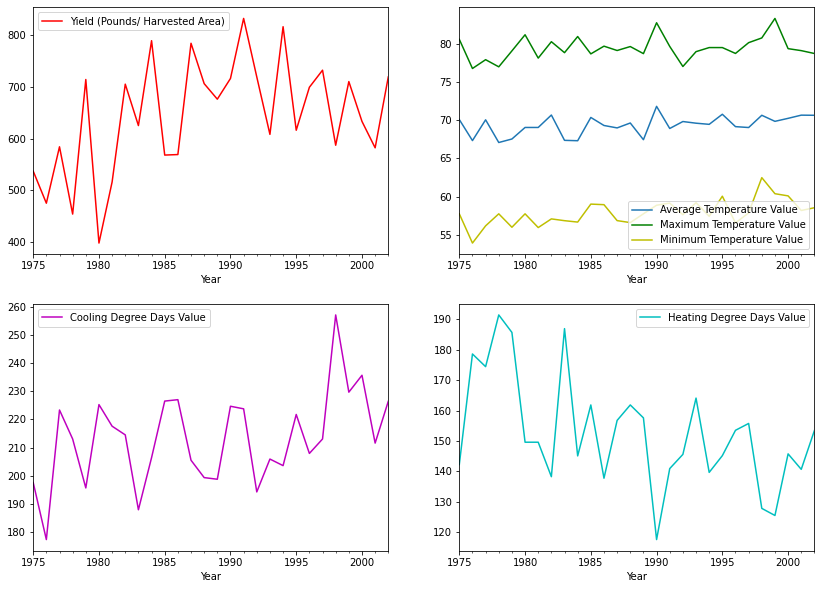

In [623]:
fig,ax = plt.subplots(2,2)
# fig.subplots_adjust(hspace=4,wspace=4)
LA_data.plot(y=['Yield (Pounds/ Harvested Area)'],ax = ax[0][0],figsize=(14,10),color="r")
LA_data.plot(y=['Average Temperature Value'],ax = ax[0][1])
LA_data.plot(y=['Maximum Temperature Value' ],ax = ax[0][1],color="g")
LA_data.plot(y=['Minimum Temperature Value' ],ax = ax[0][1],color="y")
LA_data.plot(y=['Cooling Degree Days Value' ],ax = ax[1][0],color="m")
LA_data.plot(y=['Heating Degree Days Value' ],ax = ax[1][1],color="c")

In [624]:
LA_data.corr()['Yield (Pounds/ Harvested Area)'].sort_values(ascending=False)[:5]

Yield (Pounds/ Harvested Area)                  1.000000
Palmer Z-Index Value                            0.661885
Planted (1000 Acres)                            0.336027
Palmer Modified Drought Index (PMDI) Anomaly    0.304582
Harvested (1000 Acres)                          0.283607
Name: Yield (Pounds/ Harvested Area), dtype: float64

<AxesSubplot:xlabel='Year'>

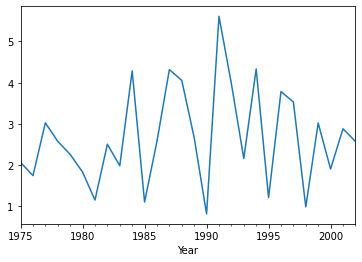

In [625]:
LA_data['Palmer Z-Index Value'].plot()

In [626]:
LA_data['Yield_Return'] = LA_data['Yield (Pounds/ Harvested Area)'].pct_change()
LA_data['Yield_Return'].autocorr()

-0.6132950205486609

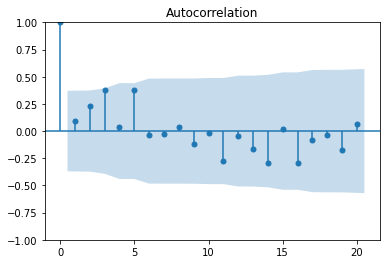

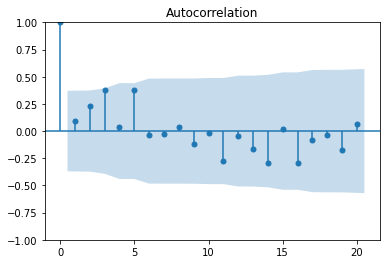

In [627]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(LA_data['Yield (Pounds/ Harvested Area)'],lags=20)

We can infer from the acf graph that there is LESS AUTOCORRELATION B/W DIFFERENT LAGS IN THE DATA  
POSITIVE CORRELATION FOR THE FIRST FOUR LAGS , AND FURTHER THAT PARSE NEGATIVE CORRELATING PATTERN

In [628]:
LA_data_stationary = LA_data['Yield (Pounds/ Harvested Area)'].diff()

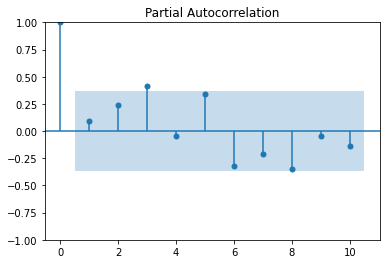

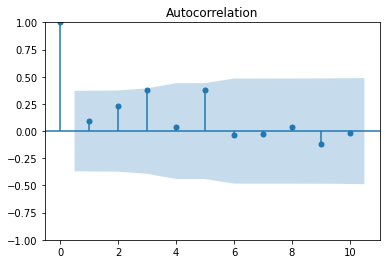

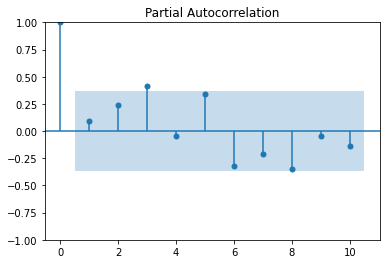

In [629]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(LA_data['Yield (Pounds/ Harvested Area)'],lags=10)
plot_pacf(LA_data['Yield (Pounds/ Harvested Area)'],lags=10)

In [631]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(LA_data['Yield (Pounds/ Harvested Area)'].diff().dropna())
results

(-7.736775556766289,
 1.0883825112872565e-11,
 1,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 199.09662883886065)

If p value < that 5% then we reject the null hypothesis that the series is a random walk 
since P=.187 > 0.05 , then the series ssuggest that it is a random walk

In [632]:
searchList_aic_bic =[]
for p in range(3):
    for q in range(3):
        model = ARIMA(LA_data['Yield (Pounds/ Harvested Area)'],order=(p,1,q),exog=LA_data['Palmer Z-Index Value'])
        results = model.fit()
        searchList_aic_bic.append((p,q,results.aic,results.bic))
        
order_df  = pd.DataFrame(searchList_aic_bic,columns=['p','q','aic','bic'])
order_df.head()

,p,q,aic,bic
0,0,0,335.329275,337.920949
1,0,1,320.457396,324.344906
2,0,2,320.055409,325.238756
3,1,0,324.938234,328.825745
4,1,1,320.519079,325.702426


In [633]:
print(order_df.sort_values('aic'))

   p  q         aic         bic
5  1  2  319.154431  325.633615
2  0  2  320.055409  325.238756
1  0  1  320.457396  324.344906
4  1  1  320.519079  325.702426
6  2  0  321.244033  326.427380
7  2  1  322.101503  328.580687
8  2  2  323.804479  331.579500
3  1  0  324.938234  328.825745
0  0  0  335.329275  337.920949


In [694]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(LA_data['Yield (Pounds/ Harvested Area)'],order=(1,1,2),exog=LA_data['Palmer Z-Index Value'])
results = model.fit()

In [695]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:     Yield (Pounds/ Harvested Area)   No. Observations:                   28
Model:                             ARIMA(1, 1, 2)   Log Likelihood                -163.955
Date:                            Wed, 14 Jun 2023   AIC                            335.911
Time:                                    18:54:40   BIC                            341.094
Sample:                                01-01-1975   HQIC                           337.452
                                     - 01-01-2002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8369      0.264     -3.166      0.002      -1.355      -0.319
ma.L1          0.2312     80.294   

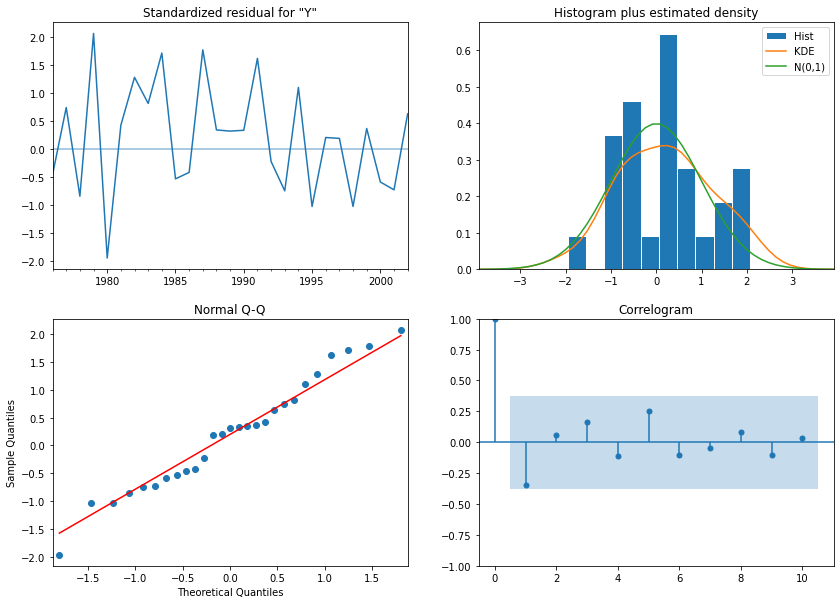

In [696]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [720]:
exog = usa_test[usa_test['State']=="LA"]['Palmer Z-Index Value']

In [722]:
exog = exog.fillna(exog.median())

In [749]:
forecast = results.get_forecast(steps=20)

In [760]:
# forecast.predicted_mean

In [751]:
confidence_intervals = forecast.conf_int()

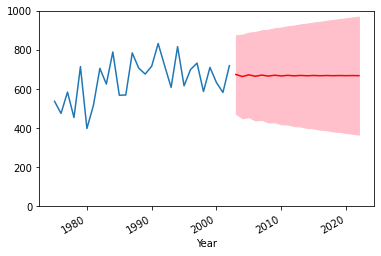

In [752]:
plt.plot(forecast.predicted_mean.index,forecast.predicted_mean,color='r',label=forecast)
LA_data['Yield (Pounds/ Harvested Area)'].plot()
plt.fill_between(confidence_intervals.index,confidence_intervals['lower Yield (Pounds/ Harvested Area)'],confidence_intervals['upper Yield (Pounds/ Harvested Area)'],color='pink')
plt.ylim(0,1000)
plt.show()

In [95]:
usa_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 1975-01-01 to 2002-01-01
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   State                                             528 non-null    object 
 1   Planted (1000 Acres)                              537 non-null    object 
 2   Harvested (1000 Acres)                            540 non-null    object 
 3   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 4   Average Temperature Value                         532 non-null    float64
 5   Average Temperature Anomaly                       529 non-null    float64
 6   Maximum Temperature Value                         538 non-null    float64
 7   Maximum Temperature Anomaly                       527 non-null    float64
 8   Minimum Temperature Value                         533 non-null    float64
 9   Mi

In [125]:
# from statsmodels.tsa.arima.model import ARIMA
# mod = ARIMA(LA_data,order=(1,0,0))
# result = mod.fit()

# Modeling For all states

In [691]:
lostates = list(usa_train.State.unique())
lostates.remove("IL")
lostates.remove("KY")
lostates.remove("NV")

Correlation Data (AL) : 
Palmer Z-Index Anomaly    0.368722
Name: Yield (Pounds/ Harvested Area), dtype: float64


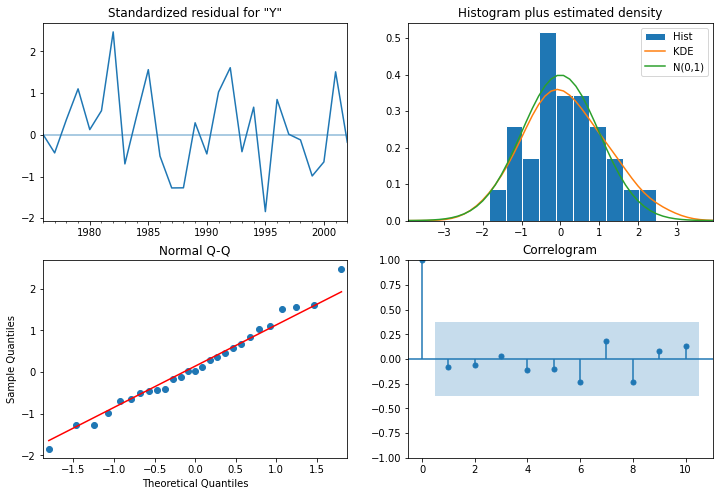

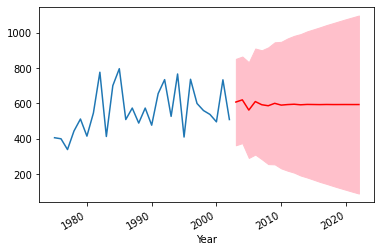

Correlation Data (AR) : 
Average Temperature Anomaly    0.307142
Name: Yield (Pounds/ Harvested Area), dtype: float64


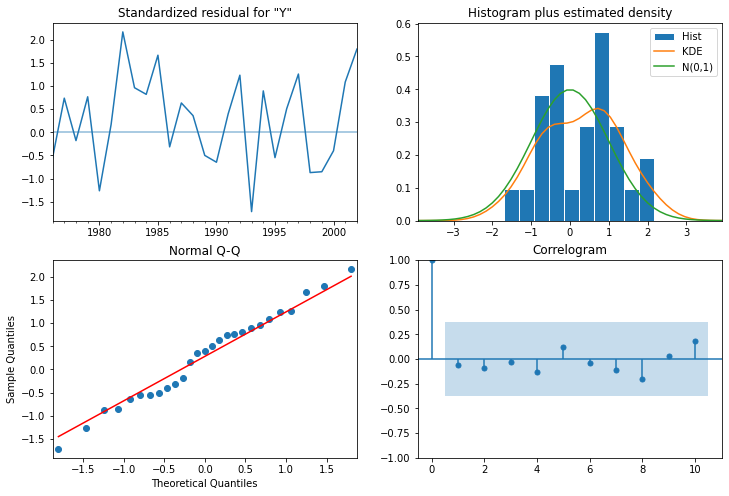

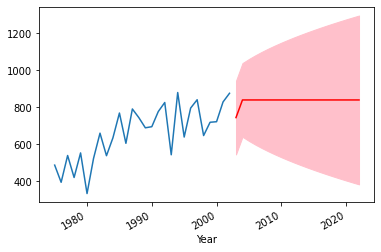

Correlation Data (AZ) : 
Maximum Temperature Anomaly    0.392553
Name: Yield (Pounds/ Harvested Area), dtype: float64


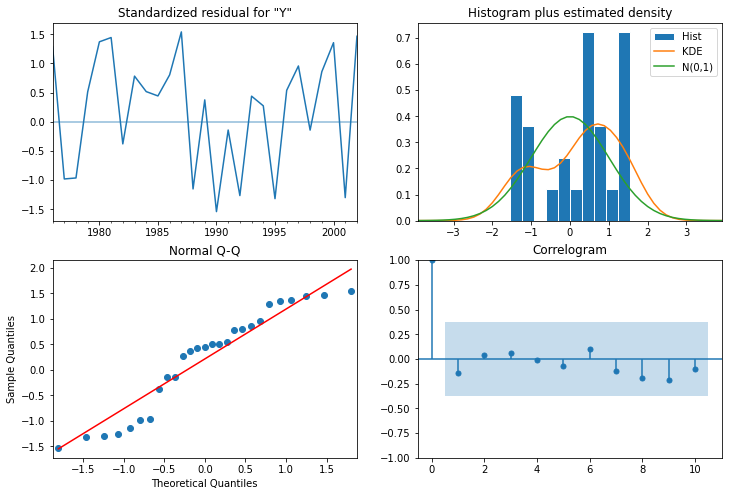

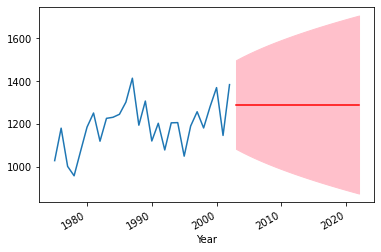

Correlation Data (CA) : 
Maximum Temperature Anomaly    0.272783
Name: Yield (Pounds/ Harvested Area), dtype: float64


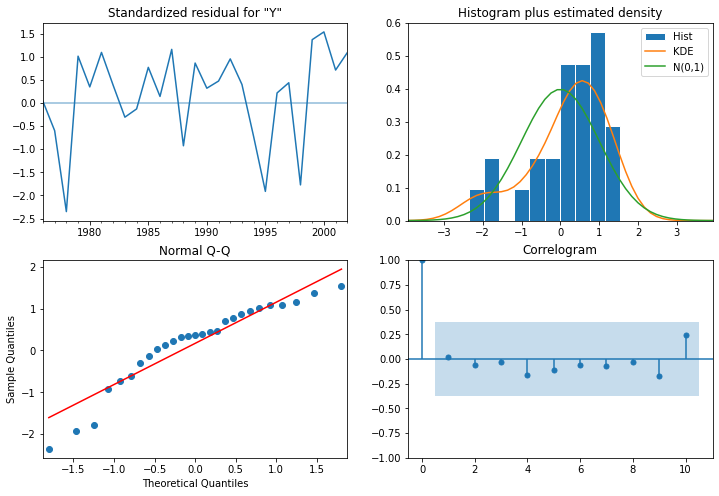

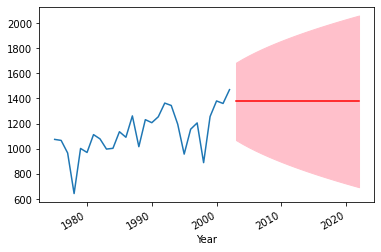

Correlation Data (FL) : 
Palmer Drought Severity Index (PDSI) Anomaly    0.443395
Name: Yield (Pounds/ Harvested Area), dtype: float64


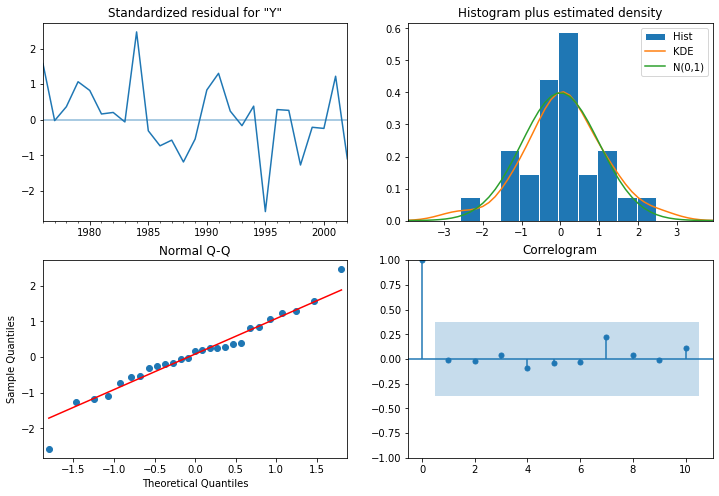

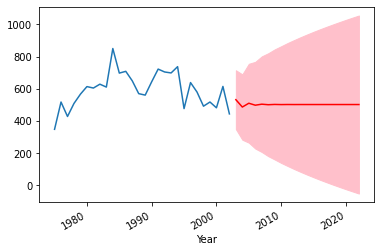

Correlation Data (GA) : 
Average Temperature Value    0.496969
Name: Yield (Pounds/ Harvested Area), dtype: float64


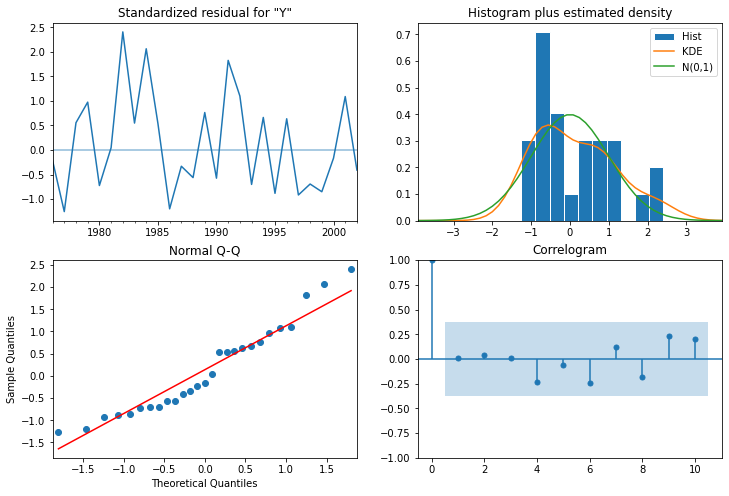

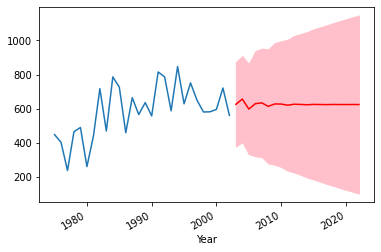

Correlation Data (KS) : 
Minimum Temperature Anomaly    0.513565
Name: Yield (Pounds/ Harvested Area), dtype: float64


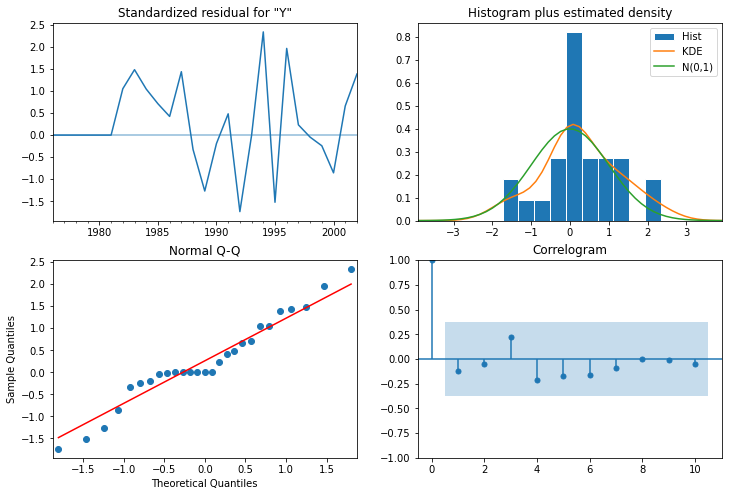

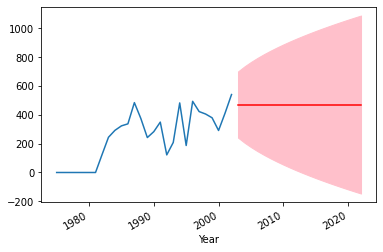

Correlation Data (LA) : 
Palmer Z-Index Value    0.669888
Name: Yield (Pounds/ Harvested Area), dtype: float64


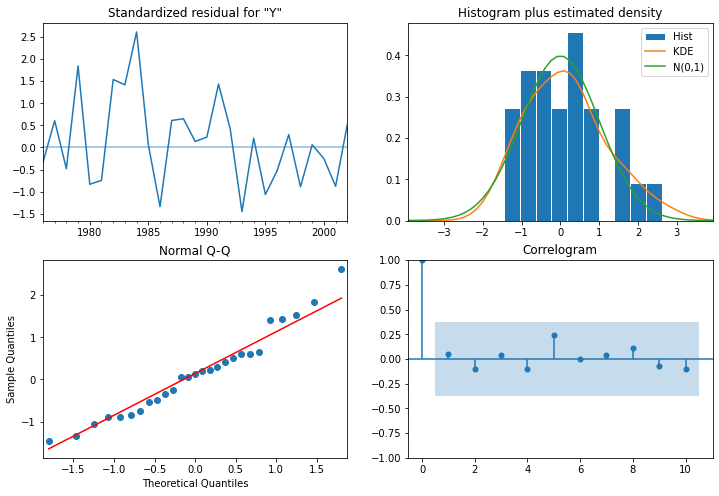

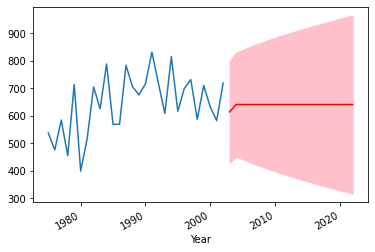

Correlation Data (MO) : 
Palmer Z-Index Value    0.373182
Name: Yield (Pounds/ Harvested Area), dtype: float64


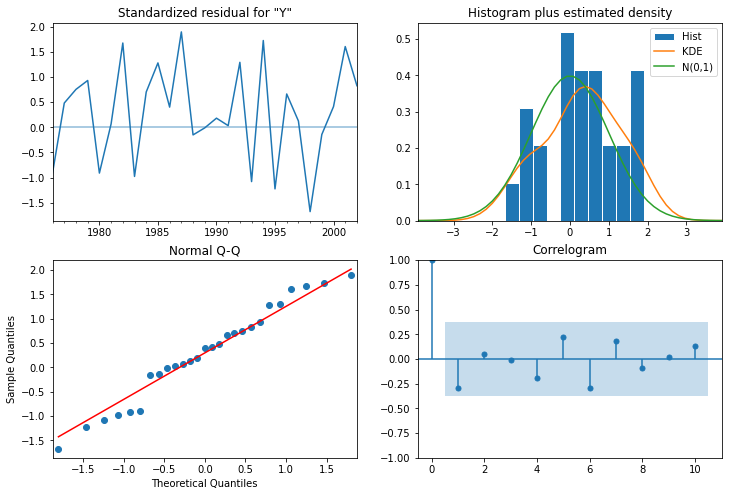

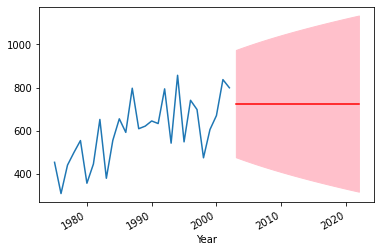

Correlation Data (MS) : 
Minimum Temperature Value    0.444831
Name: Yield (Pounds/ Harvested Area), dtype: float64


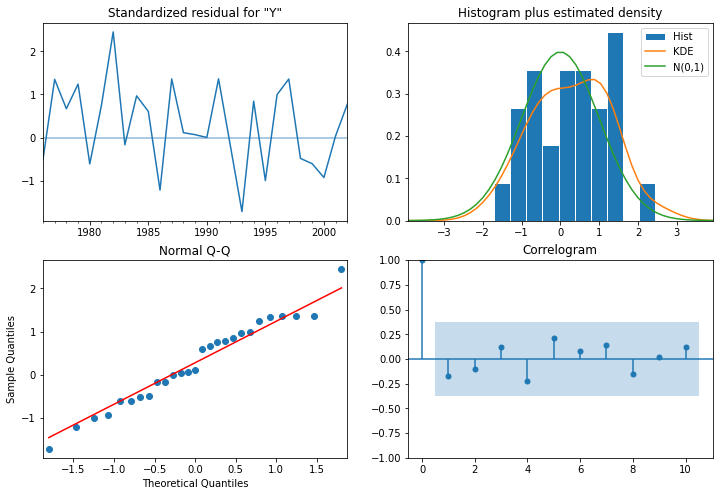

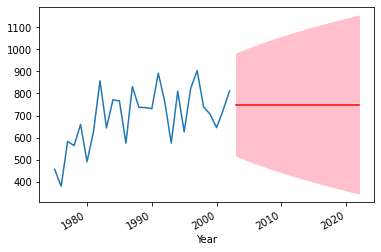

Correlation Data (NC) : 
Precipitation Anomaly    0.302463
Name: Yield (Pounds/ Harvested Area), dtype: float64


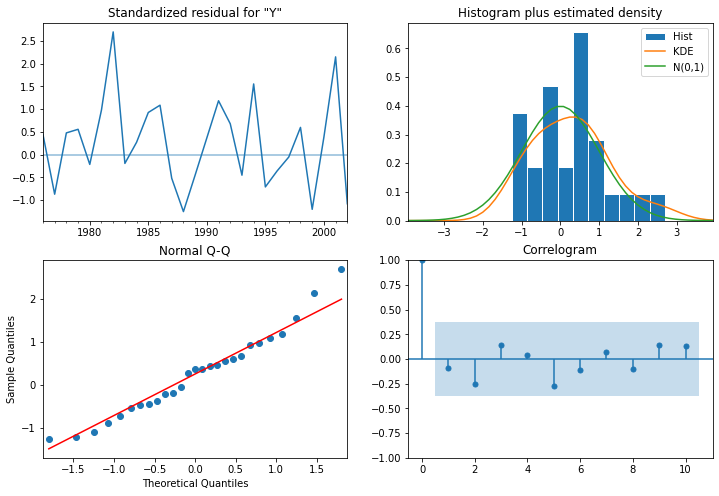

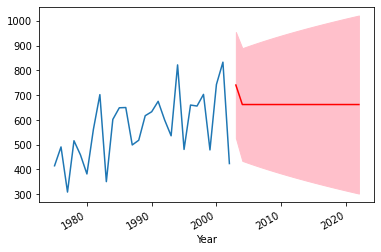

Correlation Data (NM) : 
Minimum Temperature Value    0.606417
Name: Yield (Pounds/ Harvested Area), dtype: float64


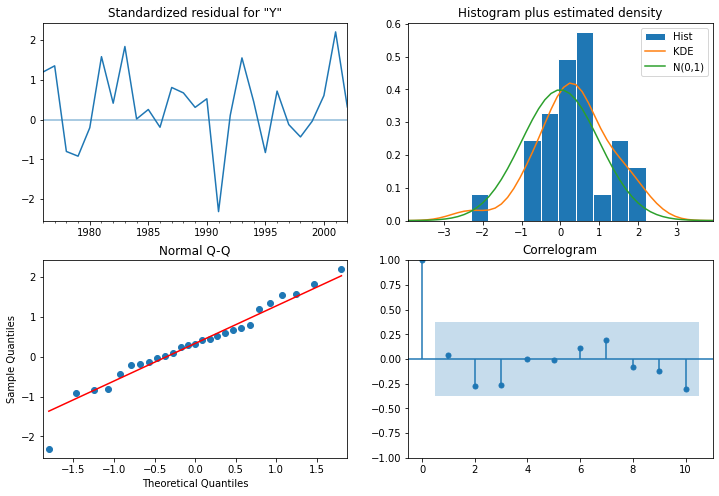

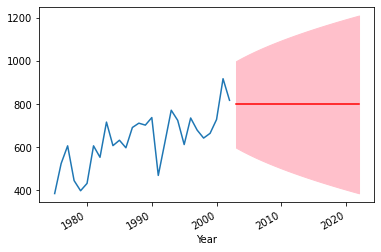

Correlation Data (OK) : 
Average Temperature Anomaly    0.572117
Name: Yield (Pounds/ Harvested Area), dtype: float64


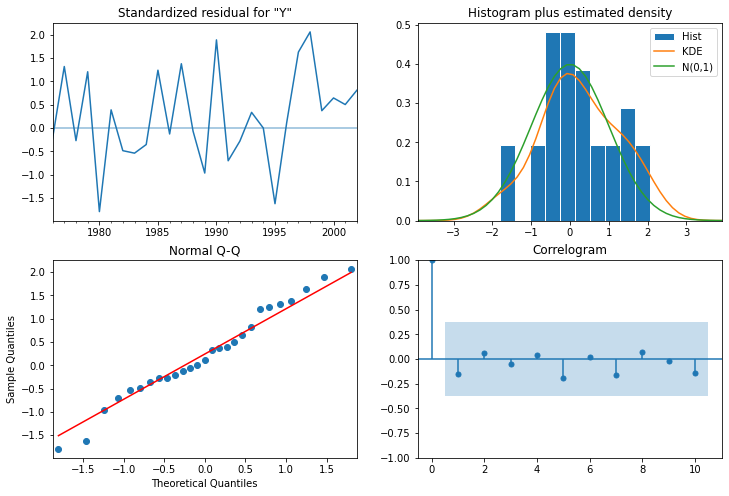

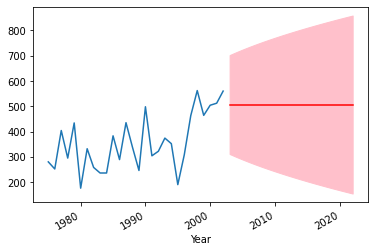

Correlation Data (SC) : 
Average Temperature Value    0.298776
Name: Yield (Pounds/ Harvested Area), dtype: float64


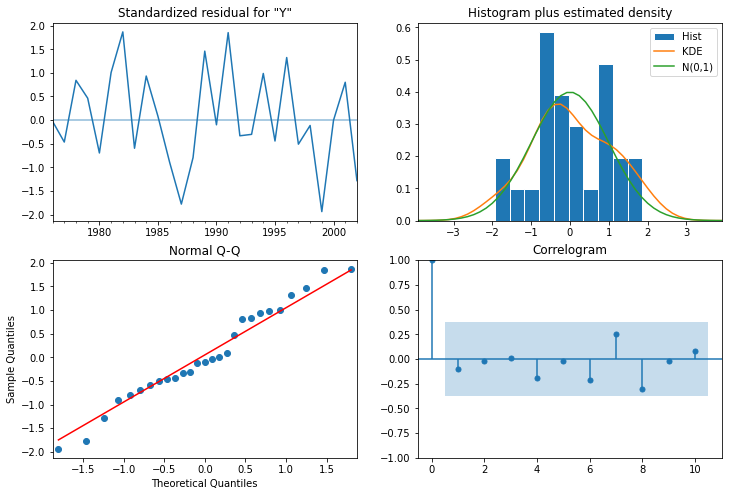

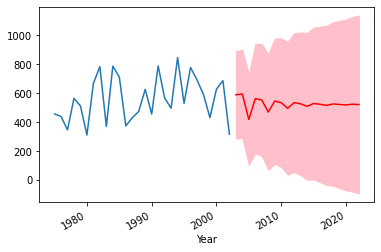

Correlation Data (TN) : 
Maximum Temperature Anomaly    0.35741
Name: Yield (Pounds/ Harvested Area), dtype: float64


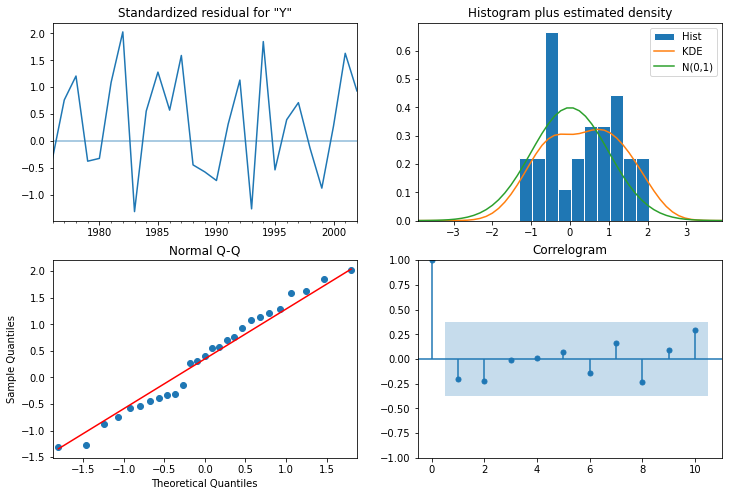

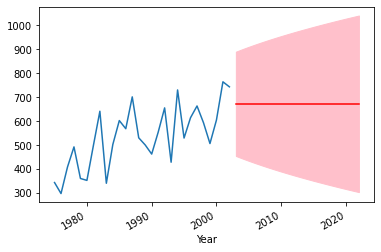

Correlation Data (TX) : 
Average Temperature Anomaly    0.464124
Name: Yield (Pounds/ Harvested Area), dtype: float64


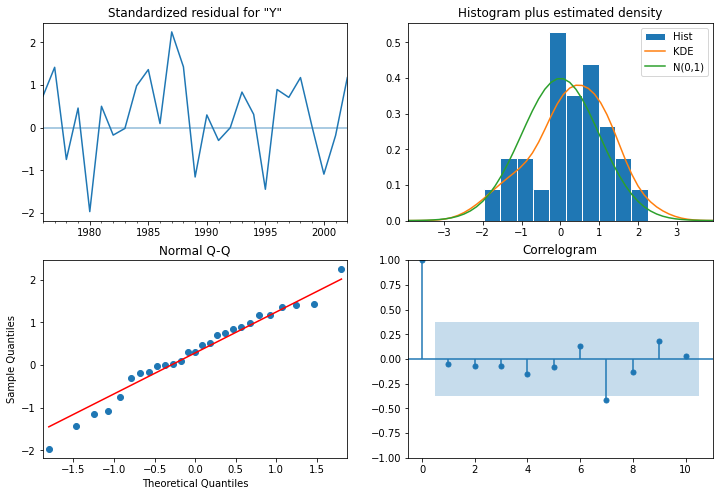

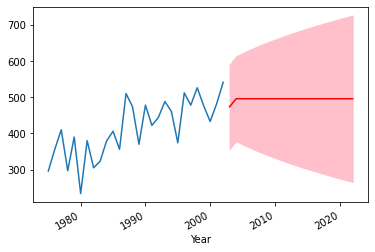

Correlation Data (VA) : 
Average Temperature Value    0.404465
Name: Yield (Pounds/ Harvested Area), dtype: float64


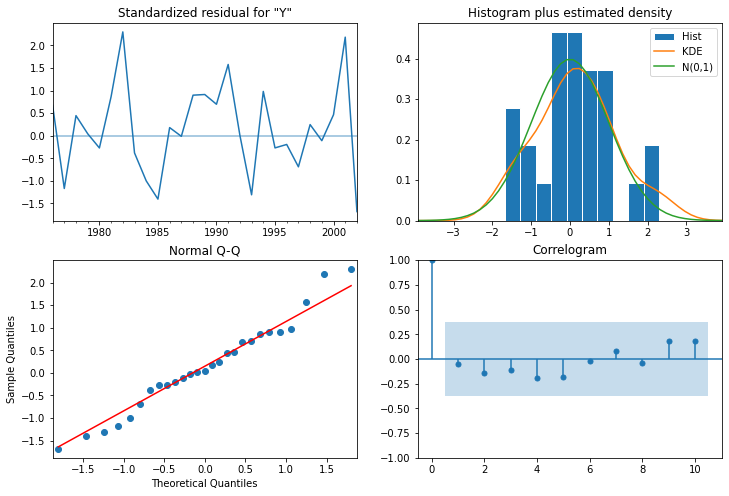

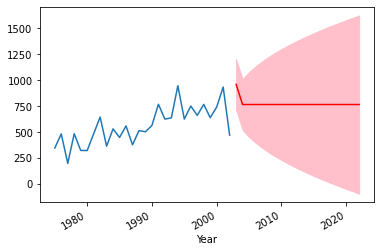

In [763]:
for i in lostates[:2]:
    state_data = usa_train[usa_train['State']==i].copy()
    corr_data = state_data.corr()['Yield (Pounds/ Harvested Area)'].sort_values(ascending=False)[1:2]
    print(f"Correlation Data ({i}) : \n{corr_data}")
    
    searchList_aic_bic =[]
    for p in range(3):
        for q in range(3):
            model = ARIMA(state_data['Yield (Pounds/ Harvested Area)'],order=(p,1,q))
            results = model.fit()
            searchList_aic_bic.append((p,q,results.aic,results.bic))
        
    order_df  = pd.DataFrame(searchList_aic_bic,columns=['p','q','aic','bic'])
    p,q = order_df.sort_values('aic').iloc[0,:2]
    
    model = ARIMA(state_data['Yield (Pounds/ Harvested Area)'],order=(p,1,q),seasonal_order=(0, 0, 0, 0))
    results = model.fit()
    
    results.plot_diagnostics(figsize=(12,8))
    plt.show()
    
#     forecast = results.get_prediction(steps=10)
    
    
    forecast = results.get_forecast(steps=20)
    confidence_intervals = forecast.conf_int()
    
    plt.plot(forecast.predicted_mean.index,forecast.predicted_mean,color='r',label=forecast)
    state_data['Yield (Pounds/ Harvested Area)'].plot()
    plt.fill_between(confidence_intervals.index,confidence_intervals['lower Yield (Pounds/ Harvested Area)'],confidence_intervals['upper Yield (Pounds/ Harvested Area)'],color='pink')
    plt.show()
    
    
    
    print("===================================================================================================")